<a href="https://colab.research.google.com/github/AgustinBiasca/Linear-Regression/blob/main/Boston_regression_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will make a regression model with the Boston data set. The objective of this nootbok is tray know who variables have an inference in the med value of house in this city and try to predict the futures values


In [ ]:
!pip install ISLP

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import(ModelSpec as MS,
                 summarize,
                 poly)

First of all i load the data, who will work. and see the diferent posibles predictors. And definited the reponse

In [ ]:
Boston = load_data('Boston')

boston = pd.DataFrame(Boston)  #transform the df to be able to see the data in the data set more easily

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
boston.shape

(506, 13)

We have 506 rows, this is the number of obervation in the data set, and 13 columns, in other words, 12 predictors

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Seems haven't a null values, and all variables are quantitatives.

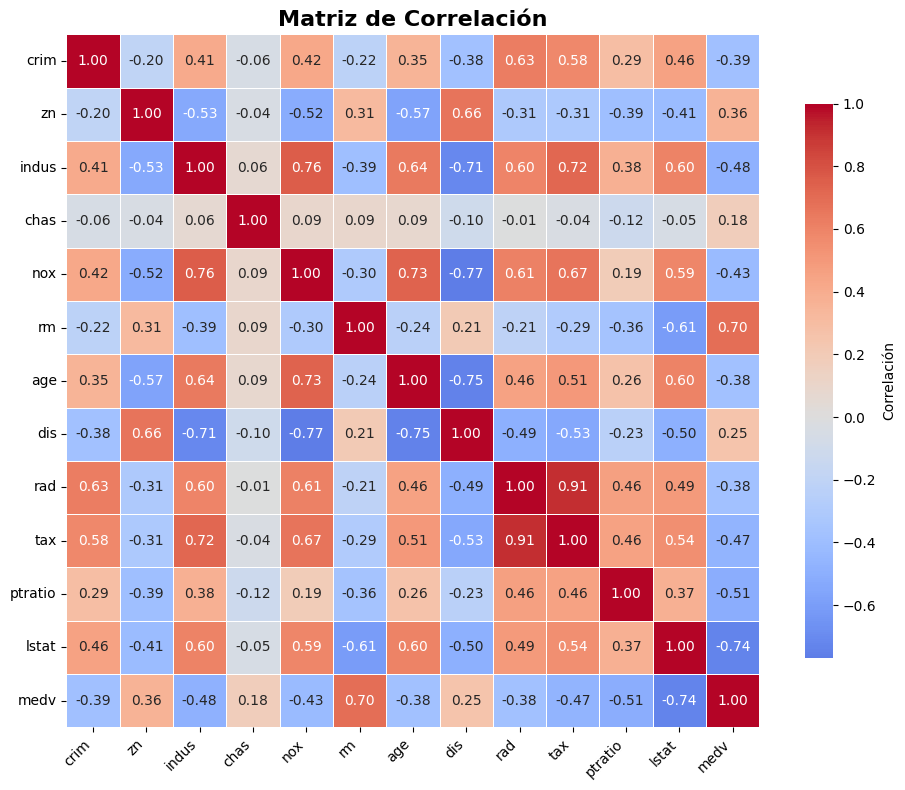

In [ ]:
corr_matrix = boston.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,            # Muestra los valores
    fmt=".2f",             # Formato de los valores
    cmap="coolwarm",       # Paleta de colores
    center=0,              # Centrado en 0
    linewidths=0.5,        # Líneas entre cuadros
    linecolor='white',     # Color de las líneas
    square=True,           # Cuadrados perfectos
    cbar_kws={"shrink": 0.8, "label": "Correlación"}  # Barra de color
)

plt.title("Matriz de Correlación", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotación de etiquetas
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




# Fit the model

We can start to train the model

In [ ]:
allvar = boston.columns.drop('medv')

X = MS(allvar).fit_transform(boston)
y = boston['medv']

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


Los coefientes nos indican como se modifica la respuesta(medv) por un incremento en una unidad del predictor. siendo todos los demas consatntes.
Un aumento de una unidad en el crimen, reduce el valor medio de las viviendas en un 0.1214 miles de dolares.

El error estándar mide la precisión con la que el modelo estima cada coeficiente. Se usa para construir intervalos de confianza y para calcular el p-valor en pruebas de significancia. Cuanto más pequeño sea el error estándar, más confiable es la estimación del coeficiente.

El valor t es el estadístico de una prueba t que evalúa si el coeficiente es significativamente distinto de cero. Se calcula como el cociente entre el valor estimado del coeficiente y su error estándar. Cuanto más grande (en valor absoluto) sea t, mayor evidencia contra la hipótesis nula de que ese predictor no tiene efecto.

El p-vaule nos dice la significancia del predictor en la respuesta. Lo usamos para rechazar la hipotesis nula



In [ ]:
print(f'The Rsquared is: {results.rsquared}')
print(f'The RSE is: {results.scale}')

The Rsquared is: 0.7343070437613076
The RSE is: 23.021133485561673


The r squeard is high, the model expalin very well.
The rse is high too, but its bad

I will eliminate the variable with high p-value

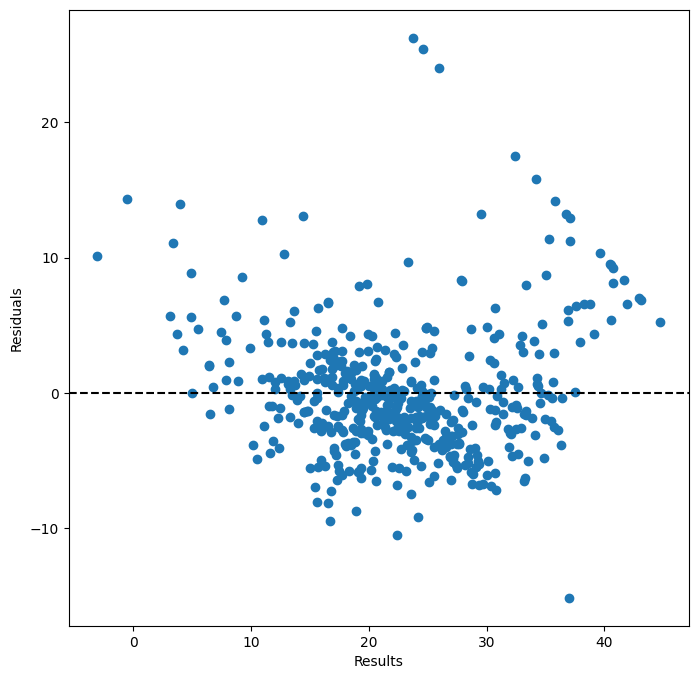

In [ ]:
#Plot's
ax = subplots(figsize= (8, 8))[1]

ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Results')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')
plt.show()

We can see a few outliers, but the relationships looks very linear, it's difficulted to see a pattern

In [ ]:
newvars = boston.columns.drop(['medv', 'indus', 'age'])

X = MS(newvars).fit_transform(boston)
y = boston['medv']

model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,41.4517,4.903,8.454,0.000
crim,-0.1217,0.033,-3.696,0.000
zn,0.0462,0.014,3.378,0.001
chas,2.8719,0.863,3.329,0.001
nox,-18.2624,3.565,-5.122,0.000
rm,3.6730,0.409,8.978,0.000
dis,-1.5160,0.188,-8.078,0.000
rad,0.2839,0.064,4.440,0.000
tax,-0.0123,0.003,-3.608,0.000
ptratio,-0.9310,0.130,-7.138,0.000


In [ ]:
print(f'The Rsquared is: {results.rsquared}')
print(f'The RSE is: {results.scale}')

print('-------------------------------------------------')

print(f'The Rsquared is: {results2.rsquared}')
print(f'The RSE is: {results2.scale}')

The Rsquared is: 0.7343070437613076
The RSE is: 23.021133485561673
-------------------------------------------------
The Rsquared is: 0.7342422518382486
The RSE is: 22.933710059207673


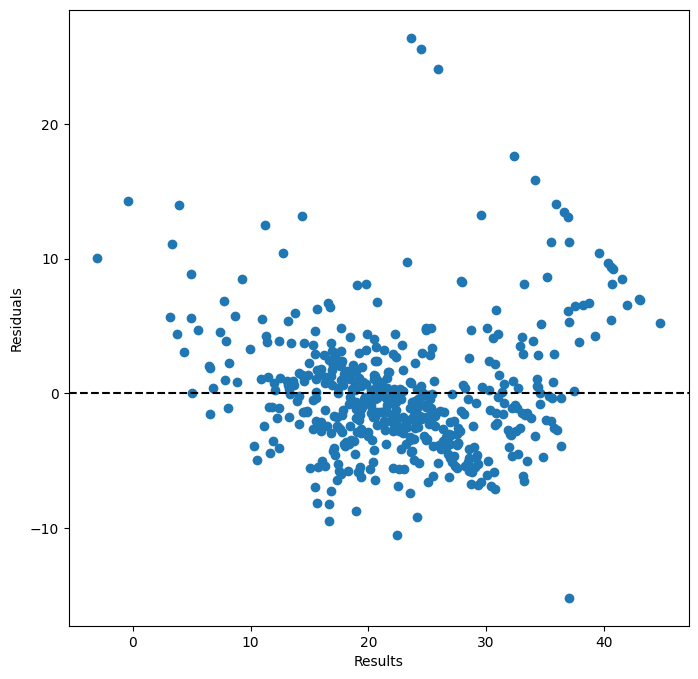

In [ ]:

ax = subplots(figsize= (8, 8))[1]

ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel('Results')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')
plt.show()

380

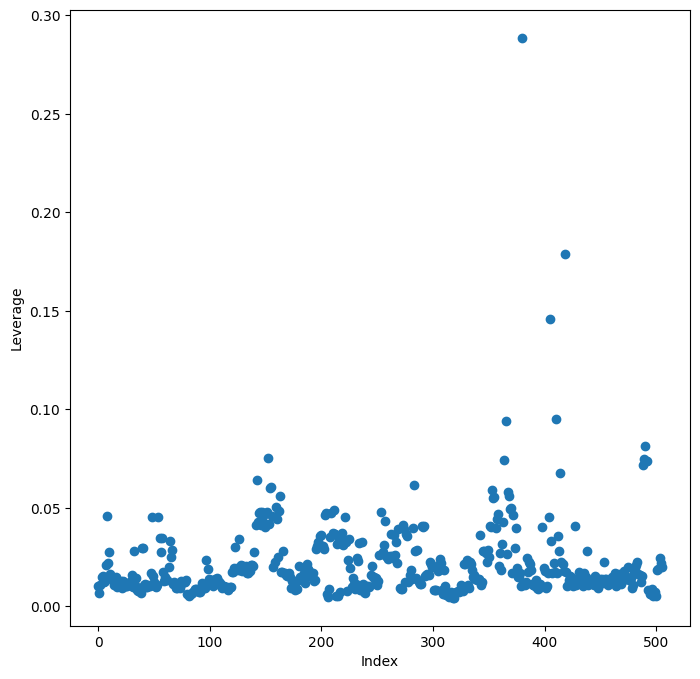

In [ ]:
# high leverage

infl = results2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)